# Singular Value Decomposition
The purpose of SVD is to decompose a matrix into the product of three matrices called-
- The left singular vectors $(\mathbf{U})$
- The singular values $(\mathbf{\Sigma})$
- The right singular vectors $(\mathbf{V})$

$\mathbf{A}=\mathbf{U\Sigma V}^T$

this decomposition is similar to eigendecomposition. In fact, think of SVD as generalized eigendecomposition to nonsquare matrices.

The singular values are comparable to eigenvalues, while the singular vector matrices are comparable to eigenvectors. (These two sets of quantities are the same under some circumstances).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

## The Big Picture of the SVD
Here is a list of the most important properties of the SVD decomposition:
- Both $\mathbf{U}$ and $\mathbf{V}$ are square matrices, even when $\mathbf{A}$ is nonsquare.
- Both $\mathbf{U}$ and $\mathbf{V}$ are orthogonal, meaning $\mathbf{U}^T\mathbf{U}=\mathbf{I}$ and $\mathbf{V}^T\mathbf{V}=\mathbf{I}$. This means each column is orthogonal to each other column, and any subset of columns is orthogonal to any other subset of columns
- The first $r$ columns of $\mathbf{U}$ provide orthogonal basis vectors for the column space of the matrix $\mathbf{A}$, while the rest of the columns provide orthogonal basis vectors for the left-null space (unless $r=M$, in which case the matrix is full column-rank and the left-null space is empty)
- The first $r$ rows of $\mathbf{V}^T$ (which are the columns of $\mathbf{V}$) provide orthogonal basis vectors for the row space, while the rest of the rows provide orthogonal basis vectors for the null space.
- The singular values matrix is a diagonal matrix of the same size of $\mathbf{A}$. The singular values are always sorted from largest to smallest.
- All singular values are nonnegative and real-valued. They cannot be complex or negative, even if the matrix contains real-valued numbers.
- The number of non-zero singular values equals the matrix rank.

The most amazing thing about the SVD is that it reveals all four subspaces of the matrix: The column space and left-null space are spanned by the first $r$ and last $M-r$ through $M$ columns of $\mathbf{U}$, while the row and space and null space are spanned by the first $r$ and last $N-r$ through $N$ rows of $\mathbf{V}^T$. For a rectangular matrix, if $r=M$, then the left-null space is empty, and if $r=N$, then the null space is empty.

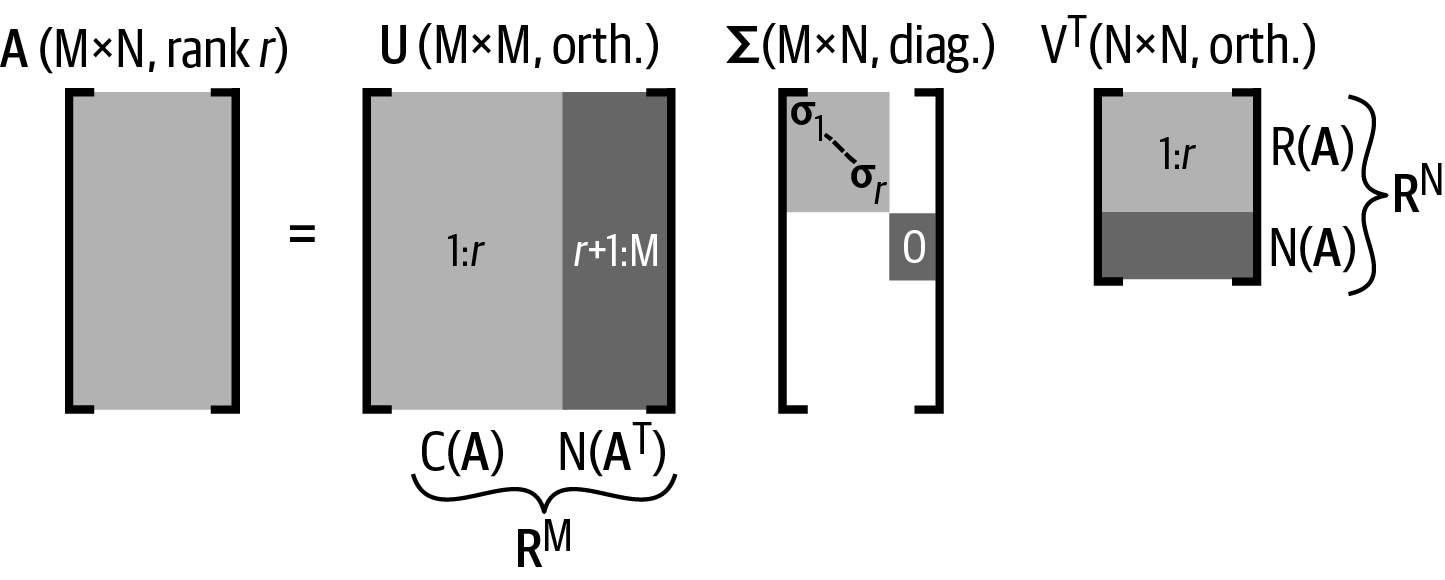

## Singular Values and Matrix Rank
* The rank of a matrix is defined as the number of nonzero singular values.
* The reason comes from the fact that the column space and the row space of the matrix are defined as the left and right singular vectors that are scaled by their corresponding singular values to have some 'volume' in the matrix space, whereas the left and right null spaces are defined as the left and right singular vectors that are scaled to zeros
* Thus the dimensionality of the column and row spaces are determined by the number of nonzero singular values

---
* we can look at the NumPy function `np.linalg.matrix_rank` to see how Python computes matrix rank:

```
S = svd(M, compute_uv=False) #return only singular values
tol = S.max()*max(M.shape[-2:])*finfo(S.dtype).eps
return count_nonzero(S>tol)
```
* The returned value is the number of singular values that exceed the value of `tol`.
* `tol` is the tolerance level that accounts for possible rounding errors. It is defined as the machine precision for this data type (eps), scaled by the largest singular value and the size of the matrix

## SVD in Python
* The SVD in python is straightforward:

`U,s,Vt = np.linalg.svd(A)`

* The singular values are returned as a vector, not a matrix of the same size as $\mathbf{A}$. To then get the $\mathbf{\Sigma}$ matrix

```
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)
```
* `np.diag(s)` only produces the correct singular values matrix for a square matrix $\mathbf{A}$. Therefore the correctly sized matrix is created first, then the diagonal is filled in.
* Notice that NumPy returns the matrix $\mathbf{V}^T$, and not $\mathbf{V}$.


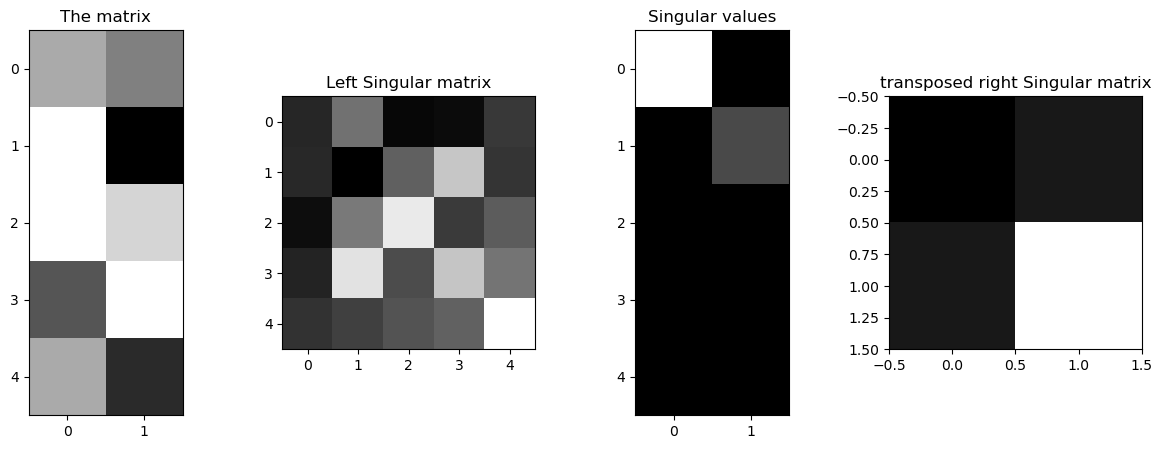

In [31]:
import numpy as np
import matplotlib.pyplot as plt
A = np.random.randint(1,20,(5,2))

U,s,Vt = np.linalg.svd(A)

fig, axs = plt.subplots(1,4,figsize=(15,5))
axs[0].imshow(A,'gray')
axs[0].set_title('The matrix')

axs[1].imshow(U,'gray')
axs[1].set_title('Left Singular matrix')

S = np.zeros((5,2))
np.fill_diagonal(S,s)

axs[2].imshow(S,'gray')
axs[2].set_title('Singular values')

axs[3].imshow(Vt,'gray')
axs[3].set_title('transposed right Singular matrix')

plt.show()

## SVD and Rank-1 'Layers' of a matrix
* The matrix SVD equation is $\mathbf{A}=\mathbf{U\Sigma V}^T$
* We can write the SVD for one vector in two different ways
  1. $\mathbf{A}v=u\sigma$
  2. $u^T\mathbf{A}=\sigma v^T$
* These equation are kind of similar to the eigenvalue equation except here are two vectors instead of one. The interpretations are therefore slightly more nuanced:
  - In general, those equations say that the effect of the matrix on one vectors is the same as the effect of a scalar on a different vector.
  - Notice that the first equation means that $u$ is in the column space of $\mathbf{A}$, with $v$ providing the weights for combining the columns.
  - Same goes for the second equation, but $v$ is in the row space of $\mathbf{A}$ with $u$ providing the weights
 
---
### What happends when you multiply one left singular vector by one right singular vector?
* Because the singular vectors are paired with the same singular value, we need to multiply the $i$th left singular vector by the $i$th right singular vector.
* Note the orientations in this vector-vector multiplication: column on the left, row on the right. That means that the result will be an outer porduct of the same size as the original matrix.
* Additionally, the outer product is a rank-1 matrix whose norm is determined by the singular value (because the singular vectors are unit length)

$u_1\sigma_1v_1^T = \mathbf{A}_1$

* The subscript one indicates that we are using the first singular vectors and the first singular value.
* It is called $\mathbf{A}_1$ because it is not $\mathbf{A}$, instead it's a rank-1 matrix of the same size as $\mathbf{A}$.
* It's not just any rank-1 matirx- it is the most important because it has the largest singular value.
* We can reconstruct the original matrix by summing all SVD 'layers' associated with $\sigma>0$

$\mathbf{A}=\Sigma_{i=1}^r u_i\sigma_iv_i^T$

* The point of showing this summation is that you don't necessarily need to use all $r$ layers; instead you can reconstruct some other matrix, let's call it $\tilde{\mathbf{A}}$, which contains the first $k<r$ layers. This is called a *low-rank approximation* of matrix $\mathbf{A}$- in ths case, a rank-$k$ approximation.

- Low rank approximations are used in data cleaning. The idea is that the information associated with smaller singular values makes little contribution to the total variance of the dataset, and therefore might reflect noise that can be removed.

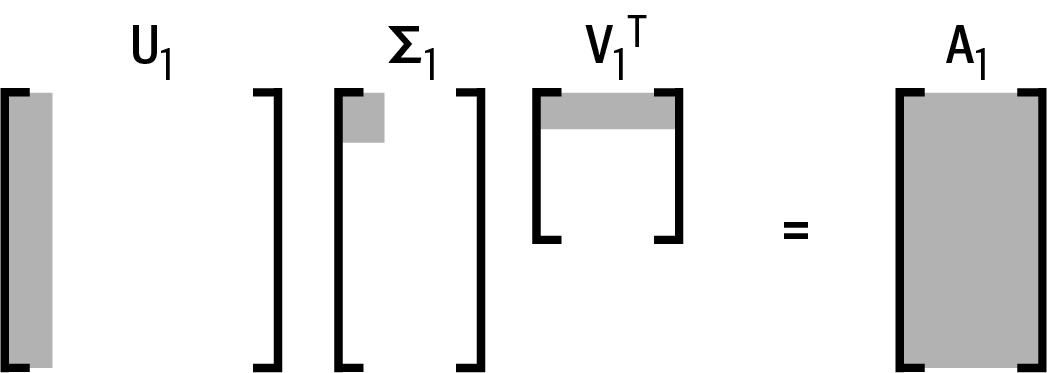

## SVD from EIG
* Conceptually, SVD is really easy. It comes from the eigendecomposition of the matrix times its transpose. The following equation show how to derive singular values and the left singular vectors

$\mathbf{AA}^T = (\mathbf{U\Sigma V}^T)(\mathbf{U\Sigma V}^T)^T$

$ = \mathbf{U\Sigma V}^T\mathbf{V\Sigma}^T\mathbf{U}^T$

$= \mathbf{U\Sigma}^2\mathbf{U}^T$

- The eigenvectors of $\mathbf{AA}^T$ are the left-singular vectors of $\mathbf{A}$, and the squared eigenvalues of $\mathbf{AA}^T$ are the singular values of $\mathbf{A}$

- This insights reveals there features of the SVD:
  1. Singular values are non-negative because squared numbers cant be negative
  2. singular-values are real-valued because symmetric matrices have real-valued eigenvalues
  3. singular vectors are orthogonal because the eigenvectors of a symmetric matrix are orthogoanl
 
* The right singular values come from pre-multiplying the matrix transpose:

$\mathbf{A}^T\mathbf{A} = (\mathbf{U\Sigma V}^T)^T(\mathbf{U\Sigma V}^T)$

$ = \mathbf{V\Sigma}^T\mathbf{U}^T\mathbf{U\Sigma V}^T$

$ = \mathbf{V\Sigma}^2\mathbf{V}^T$

* we can also rearrange the SVD equation to solve for the right-singular vectors without having to compute the eigendecomposition of $\mathbf{A}^T\mathbf{A}$:

$\mathbf{V}^T=\Sigma^{-1}\mathbf{U}^T\mathbf{A}$

* We can do the same to find $\mathbf{U}$ if you already know $\mathbf{V}$

## SVD of $\mathbf{A}^T\mathbf{A}$
* If a matrix can be expressed as $\mathbf{S}=\mathbf{A}^T\mathbf{A}$, then it's left and right singular vectors are equal